## Import TensorFlow

In [ ]:
# Import Library
import tensorflow as tf

print(tf.__version__)

2.7.0


## Load the dataset

In [ ]:
# Load the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
X_train.shape

(60000, 28, 28)

## Build the model

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')                               
])

## Train the model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3009 - accuracy: 0.9114 - val_loss: 0.1498 - val_accuracy: 0.9542
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9565 - val_loss: 0.1053 - val_accuracy: 0.9666
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1103 - accuracy: 0.9664 - val_loss: 0.0899 - val_accuracy: 0.9724
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0782 - val_accuracy: 0.9748
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0756 - val_accuracy: 0.9766
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0742 - val_accuracy: 0.9769
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9804 - val_loss: 0.0669 - val_accuracy:

## Evaluate the model

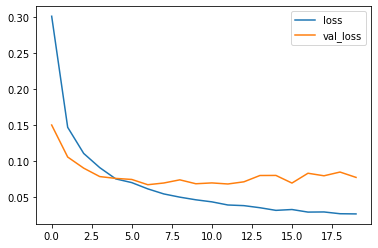

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

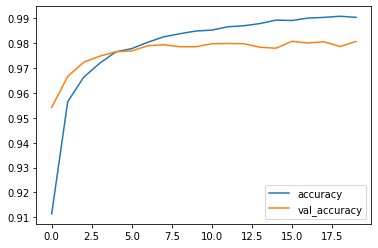

In [29]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [30]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9807


[0.07702690362930298, 0.9807000160217285]

In [42]:
# Plot confusion matrix Func
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  
  if normalize:
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:,  np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(conf_mat)

  plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = conf_mat.max() / 2.
  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
      plt.text(j, i, format(conf_mat[i, j], fmt),
               horizontalalignment="center",
               color="white" if conf_mat[i, j] > thresh else "black")
      
  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()


Confusion matrix, without normalization
[[ 972    0    1    2    0    1    1    1    2    0]
 [   0 1118    2    1    0    0    5    1    8    0]
 [   3    1 1001    7    3    0    1    7    9    0]
 [   0    0    3  994    0    4    0    4    1    4]
 [   0    0    2    0  964    0    5    0    2    9]
 [   2    0    0   10    2  867    5    1    4    1]
 [   7    2    0    1    1    2  942    0    3    0]
 [   2    0   10    3    0    0    0 1006    1    6]
 [   4    0    1    3    2    1    1    4  955    3]
 [   0    1    0    6    7    1    1    3    2  988]]


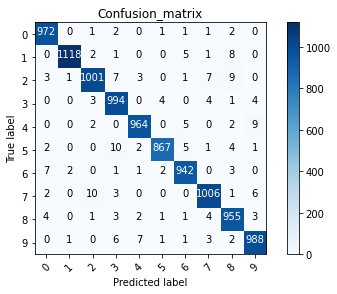

In [57]:
# Predict & Evaluate
pred_test = model.predict(X_test).argmax(axis=1)
conf_mat = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(conf_mat, list(range(10)))

## Prediction

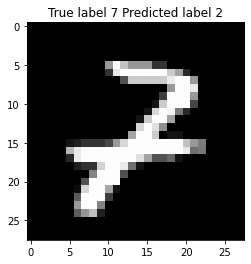

In [60]:
# Show Misclassified example
misclassified_idx = np.where(pred_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label %s Predicted label %s" % (y_test[i], pred_test[i]));